In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import ADASYN

In [24]:
df1 = pd.read_csv('03_Cleaned_File(Data Preprocessing).csv')

In [25]:
df1.head()

,CustomerId,Surname,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,0,42,101348.88,0.00,1,1,2,1,1,0,0
1,15647311,Hill,608,0,41,112542.58,83807.86,1,1,1,1,0,0,1
2,15619304,Onio,502,0,42,113931.57,159660.80,3,0,8,0,1,0,0
3,15701354,Boni,699,0,39,93826.63,0.00,2,0,1,0,0,0,0
4,15737888,Mitchell,850,0,43,79084.10,125510.82,1,1,2,1,0,0,1


In [26]:
X = df1.drop(columns = ['CustomerId', 'Surname', 'Exited'])
y = df1['Exited']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 42)

In [28]:
X_train.head()

,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Geography_Germany,Geography_Spain
6715,663,0,58,74176.71,216109.88,1,1,5,1,0,1
1561,559,0,40,32635.54,139129.44,1,1,5,1,0,1
1670,513,0,37,110142.34,0.00,2,0,6,0,0,0
4345,615,1,24,179488.41,108528.07,2,0,8,0,1,0
8098,663,1,40,33607.72,156218.19,1,1,6,1,0,0


In [29]:
scaler = StandardScaler()
columns = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance']
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

In [30]:
X_train.head()

,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Geography_Germany,Geography_Spain
6715,0.130536,0,1.814595,-0.452000,2.229559,1,1,5,1,0,1
1561,-0.945827,0,0.101627,-1.172053,0.999620,1,1,5,1,0,1
1670,-1.421911,0,-0.183868,0.171409,-1.223291,2,0,6,0,0,0
4345,-0.366247,1,-1.421012,1.373417,0.510693,2,0,8,0,1,0
8098,0.130536,1,0.101627,-1.155202,1.272652,1,1,6,1,0,0


In [31]:
y_train.value_counts()

Exited
0    6379
1    1618
Name: count, dtype: int64

In [32]:
over_samp = ADASYN()
X_train, y_train = over_samp.fit_resample(X_train, y_train)

In [33]:
y_train.value_counts()

Exited
1    6566
0    6379
Name: count, dtype: int64

In [34]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    # 'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [35]:
rf = RandomForestClassifier(random_state = 42)

In [36]:
scoring = {
    'accuracy' : 'accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1'
}

grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 5,
                           scoring = scoring,
                           refit = 'recall'
)


In [37]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [38]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [39]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

In [40]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[1363,  144],
       [ 218,  275]], dtype=int64)

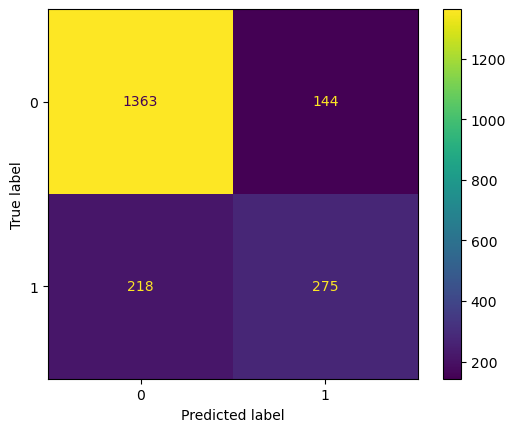

In [41]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [42]:
class0_accuracy = cm[0,0] / cm[0].sum()
class1_accuracy = cm[1,1] / cm[1].sum()
print(f"Class 0 Accuracy: {class0_accuracy:.2f}")
print(f"Class 1 Accuracy: {class1_accuracy:.2f}")

Class 0 Accuracy: 0.90
Class 1 Accuracy: 0.56


In [43]:
print(f'Accuracy : {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision : {precision_score(y_test, y_pred):.2f}')
print(f'Recall : {recall_score(y_test, y_pred):.2f}')
print(f'F1 Score : {f1_score(y_test, y_pred):.2f}')

Accuracy : 0.82
Precision : 0.56
Recall : 0.66
F1 Score : 0.60


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1581
           1       0.56      0.66      0.60       419

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.83      0.82      0.82      2000

